# Advent of code 2024

It's time for AOC 2024! This time, I will put all answers in one notebook, so we can get a nice overview of runtimes and answers over time. To brighten things up a bit, I added some (AI generated) images corresponding to the problem description. 

In [23]:
import backend
import re
from itertools import combinations, combinations_with_replacement, permutations

backend.run_results = list()

<img src='notebook_images/day1.webp'/>

# Day 1 : <a href="https://adventofcode.com/2024/day/1">Historian Hysteria</a>

## Part 1

For our first problem we will need to sort two lists, and take the sum of each pair of numbers in the sorted lists. Again, I will use my file parser to convert the input to some tuples, and convert them into a NumPy array.

In [68]:
test_input = backend.parseInput("""3   4
4   3
2   5
1   3
3   9
3   3""", parseMethod = backend.parseInts)


def day_1_part_1(lines : list):
    first_list = sorted(tuple(line[0] for line in lines))
    second_list = sorted(tuple(line[1] for line in lines))
    differences = (abs(first_list[i] - second_list[i]) for i in range(len(first_list)))
    return(sum(differences))

backend.test(day_1_part_1, test_input, 11)


__________ Input to be parsed __________
3   4
4   3
2   5
1   3
3   9
... and maybe more
____________________
__________ Parsed input __________
(3, 4)
(4, 3)
(2, 5)
(1, 3)
(3, 9)
... and maybe more
____________________
Answer: 11            0.000014 seconds
Test succeeded.


In [69]:
real_input = backend.parseInput(open("inputs/day1.txt").read(), backend.parseInts)

backend.run(day_1_part_1, real_input, 1, 1)

__________ Input to be parsed __________
76309   75213
79731   28444
29583   71339
60992   99148
34680   74530
... and maybe more
____________________
__________ Parsed input __________
(76309, 75213)
(79731, 28444)
(29583, 71339)
(60992, 99148)
(34680, 74530)
... and maybe more
____________________
Answer for day 1 part 1: 1110981  Average time  0.000752 seconds


1110981

That was easy! Now on to part 2.

## Part 2

It turns out that our first list contains ID's and we need to count each ID in the second list. We multiply the ID by the number of occurences in the second list, to obtain the <b>Similarity score</b>.

In [70]:
def day_1_part_2(lines : list):
    first_list = tuple(line[0] for line in lines)
    second_list = tuple(line[1] for line in lines)
    similarity_scores = map(lambda e: e * second_list.count(e), first_list)
    return(sum(similarity_scores))
    
backend.test(day_1_part_2, test_input, 31)

Answer: 31            0.000019 seconds
Test succeeded.


In [71]:
backend.run(day_1_part_2, real_input, 1, 2)

Answer for day 1 part 2: 24869388  Average time  0.010705 seconds


24869388

Day 1 was quite doable, as ever with AOC. Let's see what day 2 brings us!

<img src='notebook_images/day2.webp'/>

# Day 2 : <a href="https://adventofcode.com/2024/day/2">Red-Nosed Reports</a>

Today, we are tasked with classifying reports whether they are either <b>safe</b> or <b>unsafe</b>.
Safe reports contain numbers in strictly increasing or strictly decreasing order (i.e. monotonic), where the increments, or decrements do not exceed 3.

For this, I introduce a function called `diff_tuple` which generates a tuple that represents the running difference of another tuple.

## Part 1


In [72]:
test_input = backend.parseInput("""7 6 4 2 1
1 2 7 8 9
9 7 6 2 1
1 3 2 4 5
8 6 4 4 1
1 3 6 7 9""", parseMethod = backend.parseInts)

def diff_tuple(t : tuple) -> tuple:
    """Returns a tuple with the one-step differences"""
    return tuple(t[i + 1] - t[i] for i in range(len(t)-1))

def is_monotonic_tuple(t : tuple) -> bool:
    """Check is a tuple either strictly increases or decreases"""
    diff_t = diff_tuple(t)
    return min(diff_t) * max(diff_t) > 0

def is_safe(report : tuple) -> bool:
    monotonic = is_monotonic_tuple(report)
    safe_abs_change = max(diff_tuple(report)) <= 3 and min(diff_tuple(report)) >= -3
    return(monotonic * safe_abs_change)

def day_2_part_1(reports : list):
    map_obj = map(is_safe, reports)
    return(sum(map_obj))

backend.test(day_2_part_1, test_input, 2)

__________ Input to be parsed __________
7 6 4 2 1
1 2 7 8 9
9 7 6 2 1
1 3 2 4 5
8 6 4 4 1
... and maybe more
____________________
__________ Parsed input __________
(7, 6, 4, 2, 1)
(1, 2, 7, 8, 9)
(9, 7, 6, 2, 1)
(1, 3, 2, 4, 5)
(8, 6, 4, 4, 1)
... and maybe more
____________________
Answer: 2            0.000037 seconds
Test succeeded.


In [73]:
real_input = backend.parseInput(open("inputs/day2.txt").read(), parseMethod = backend.parseInts)
backend.run(day_2_part_1, real_input, 2, 1)

__________ Input to be parsed __________
20 21 24 25 27 29 27
60 61 62 64 64
15 18 21 22 25 26 30
5 8 11 14 16 19 20 26
20 22 20 23 24
... and maybe more
____________________
__________ Parsed input __________
(20, 21, 24, 25, 27, 29, 27)
(60, 61, 62, 64, 64)
(15, 18, 21, 22, 25, 26, 30)
(5, 8, 11, 14, 16, 19, 20, 26)
(20, 22, 20, 23, 24)
... and maybe more
____________________
Answer for day 2 part 1: 526  Average time  0.004865 seconds


526

## Part 2

It turns out that the facility contains a <b>problem dampener</b>, that can remove a single element from a report to make it safe. We now need to figure out how many reports are safe after the problem dampener removed a single element from a report to make it safe (if possible). For this, I use a simple approach by checking whether we obtain a safe list by removing any element from the report.

In [74]:
def list_without(l : list, i: int) -> list:
    """Returns a list with index i removed"""
    l_copy = l.copy()
    l_copy.pop(i)
    return(l_copy)

def problem_dampener(report : tuple):
    if is_safe(report) : return True
    report_list = list(report)
    return(sum(map(lambda e : is_safe(list_without(report_list, e)), range(len(report_list)))) > 0)
    
def day_2_part_2(input):
    map_obj = map(problem_dampener, [report for report in input])
    return(sum(map_obj))

backend.test(day_2_part_2, test_input, 4)

Answer: 4            0.000138 seconds
Test succeeded.


In [75]:
backend.run(day_2_part_2, real_input, 2, 2)

Answer for day 2 part 2: 566  Average time  0.020368 seconds


566

<img src='notebook_images/day3.webp'/>

# Day 3 : <a href="https://adventofcode.com/2024/day/3">Mull It Over</a>

Time for some <b>multiplication</b>! The owner of the Toboggan rental shop asks us to help carry out some corrupted multiplication instructions on their (probably worn out) computer.

## Part 1
We are tasked with finding all occurrences of instructions of the form `mul(x,y)` where `x` and `y` are 1 to 3 digit numbers. We are asked to find the sum of all the outcomes. In this case, I refrain from using my `backend` as we can use some simple regex to find all valid `mul` instructions:

In [76]:
test_input = """xmul(2,4)%&mul[3,7]!@^do_not_mul(5,5)+mul(32,64]then(mul(11,8)mul(8,5))"""
def perform_mul(mul_instruction : str):
    numbers = list(map(int,  re.findall(r"\d+",mul_instruction)))
    assert len(numbers) == 2, f"Can only multiply if the multiplication instruction is of length two. Got {mul_instruction} as instruction instead."
    return(numbers[0] * numbers[1])

def day_3_part_1(input : str):
    mul_instructions = re.findall(r"mul\(\d+,\d+\)", input)
    return sum(map(perform_mul, mul_instructions))

backend.test(day_3_part_1, test_input, 161)


Answer: 161            0.000041 seconds
Test succeeded.


In [77]:
real_input = open("inputs/day3.txt").read()

backend.run(day_3_part_1, real_input, 3, 1)

Answer for day 3 part 1: 192767529  Average time  0.001913 seconds


192767529

## Part 2
It turns out that our input file also contains additional instructions, namely `do()` and `don't()`, which tells us to carry out any instructions that follow, or ignore any of the following instructions. 

To solve this, I wrote a function that finds the locations of all `do()`, `don't()` and `mul()` instructions. A `mul()` instruction should be carried out if the largest `do()` location that comes before it is bigger than the largest `don't()` location that comes before it. We filter the `mul()` instructions, and once again apply the `perform_mul()` on all filtered instructions.

In [78]:
test_input = "xmul(2,4)&mul[3,7]!^don't()_mul(5,5)+mul(32,64](mul(11,8)undo()?mul(8,5))"

def regexp_locs(input : str, r_exp : str) -> list:
    """Returns a list of locations where the regular expression was found""" 
    m_iterable = re.finditer(r_exp, input)
    return [m.span()[0] for m in m_iterable]

def smaller_elements(l : list, compare : int) -> list:
    """Returns a copy of l with only the elements smaller than 'compare'"""
    return[li for li in l if li < compare]

def should_carry_out_mul(mul_location : int, do_locations : list, dont_locations : list) -> bool:
    """Checks whether a mul corresponding to a location should be carried out"""
    previous_do_locations = smaller_elements(do_locations, mul_location)
    previous_dont_locations = smaller_elements(dont_locations, mul_location)
    if len(previous_dont_locations) == 0 : return True
    if len(previous_do_locations) == 0 : previous_do_locations = [-1]
    latest_do = max(previous_do_locations)
    latest_dont = max(previous_dont_locations)
    return(latest_do > latest_dont)

def filter_muls(input : str) -> list:
    """Returns a list of mul instructions after filtering the 'do' and 'dont' instructions."""
    # Look for locations of mul instructions
    mul_locations = regexp_locs(input, r"mul\(\d+,\d+\)")
    mul_instructions = re.findall(r"mul\(\d+,\d+\)", input)
    do_locations = regexp_locs(input, r"do\(\)")
    dont_locations = regexp_locs(input, r"don't\(\)")

    unignored_locations = [location for location in mul_locations if should_carry_out_mul(location, do_locations, dont_locations)]
    return([mul_instructions[mul_locations.index(i)] for i in unignored_locations])
    
def day_3_part_2(input : str):
    return(sum(map(perform_mul, filter_muls(input))))

backend.test(day_3_part_2, test_input, 48)

Answer: 48            0.000091 seconds
Test succeeded.


In [79]:
backend.run(day_3_part_2, real_input, 3, 2)

Answer for day 3 part 2: 104083373  Average time  0.006189 seconds


104083373

<img src='notebook_images/day4.webp'/>

# Day 4 : <a href="https://adventofcode.com/2024/day/4">Ceres Search</a>

If you take part in AOC you should like puzzles right? I do, but I definitely do not like crossword puzzles...

## Part 1
Today, we are tasked with solving a crossword puzzle. More specifically, we are given a crossword puzzle consisting of only the letters `X`, `M`, `A` and `S`. Funnily enough these letters spell `XMAS`. Which is exactly what we should look for. In this problem we need to count how many times the word `XMAS` appears, horizontally, vertically and diagonally. In regular or reversed order.

In order to do so I create a function called `count_horizontals` which takes in a cross word puzzle and counts all occurrences of the word `XMAS`, in both directions. I can then transpose the crossword so the rows become columns and apply `count_horizontals` again. Finally, I create a function that takes all diagonal cuts of the crossword and we run `count_horizontals` on all diagonals as well. 

In [80]:
test_input = backend.parseInput("""MMMSXXMASM
MSAMXMSMSA
AMXSXMAAMM
MSAMASMSMX
XMASAMXAMM
XXAMMXXAMA
SMSMSASXSS
SAXAMASAAA
MAMMMXMMMM
MXMXAXMASX""")

def horizontal_flipped_cw(crossword : list) -> list:
    return ["".join(reversed(line)) for line in crossword]

def get_diagonals(crossword : list) -> list:
    n_col, n_row = len(crossword[0]), len(crossword)
    lower_diag = ["".join(crossword[i+j][j] for j in range(n_col) if i + j < n_col) for i in range(n_row)]
    upper_diag = ["".join(crossword[i][j + i] for i in range(n_row) if i + j < n_row) for j in range(n_col)][1:]
    crossword = horizontal_flipped_cw(crossword) # Flip the crossword and add the other diagonals
    lower_diag += ["".join(crossword[i+j][j] for j in range(n_col) if i + j < n_col) for i in range(n_row)]
    upper_diag += ["".join(crossword[i][j + i] for i in range(n_row) if i + j < n_row) for j in range(n_col)][1:]
    return(lower_diag + upper_diag) # The middle diagonal is double counted, so we ignore one of them

def transposed_cw(crossword : list) -> list:
    return [''.join(list(i)) for i in zip(*crossword)]

def count_horizontals(crossword : list, word = "xmas") -> int:
    """Counts how many time the word appears horizontally in a crossword"""
    left_to_right = sum(map(lambda w : len(re.findall(rf"(?i){word}", w)), crossword))
    right_to_left = sum(map(lambda w : len(re.findall(rf"(?i){word[::-1]}", w)), crossword))
    return(left_to_right + right_to_left)

def count_verticals(crossword : list, word = "xmas") -> int:
    """Counts how many times the word appears vertically in a crossword"""
    return(count_horizontals(transposed_cw(crossword), word))

def count_diagonals(crossword : list, word = "xmas") -> int:
    """Counts how many times the word appears on the diagonals of a crossword"""
    return count_horizontals(get_diagonals(crossword), word)

def count_all(crossword : list, word = "xmas") -> int:
    return count_diagonals(crossword, word) + count_horizontals(crossword, word) + count_verticals(crossword, word)

backend.test(count_all, test_input, 18)

__________ Input to be parsed __________
MMMSXXMASM
MSAMXMSMSA
AMXSXMAAMM
MSAMASMSMX
XMASAMXAMM
... and maybe more
____________________
__________ Parsed input __________
MMMSXXMASM
MSAMXMSMSA
AMXSXMAAMM
MSAMASMSMX
XMASAMXAMM
... and maybe more
____________________
Answer: 18            0.000637 seconds
Test succeeded.


In [81]:
real_input = backend.parseInput(open("inputs/day4.txt").read())
backend.run(count_all, real_input, 4, 1)

__________ Input to be parsed __________
XMASAXMASXXMMAMAXAXXXMSASXSXSXMAMMAMXMASASXMXMASMSMSSMMSXMASXMSMXMASMMSSMMMSMMAMMSMMMMMSXMAXMSMMMMMSAXAXXXMASAMXXSXMXSSSMSMSXMAMXXXSAXSMSAMX
MSMMMMSMXMXSSSSSSMSMSMSASAAXXASAXXMAXSMSAMMSAMSXAAAAXSAMXMASXMXMASAMXXAAAXMAMMAAMAMXAASAMMMSAMXMAASMSXMSMSMXMASMXMASXMAAXAAAXXSSSMMAMMXAXSXX
AAAAAAAMMSAAMAAAXAAAAAMMMMMXMXMASXMSASXMAMAMASAMSMMMXMXSAMXSXMASXSAMXMSSMMSASXXSSMMSAMMASAAAAXXXSMSAAMXAAMSXSAMASAAMAMAMSMSMSMAAASAAXAMXMMMS
SSSMMSSSSMSSMMMMMSMXMMMAAXXAXAMXMXAMASMSMMMSMMMXASAMXSMSXSAMAXAMAMASAMXAXXMAMXAAMXXMXMMAMMSSSMXXXAMXMAMMSMAXMASXXMASMMAXAAAXAAMMMMSXXSAMXAAA
XMAXMXXMAAAXXXAMXXSMMMSMMSAMXMMMMMXMXMAAMAASAMXSAXXMAXAMXMMSSMSSSSMMASXMMMMAMSSMSMMAAXMASXAAAAASMMMSXSXAXMAMSAMXSSMSXMAMMXMSMSSXSAMXAAXXSMSS
... and maybe more
____________________
__________ Parsed input __________
XMASAXMASXXMMAMAXAXXXMSASXSXSXMAMMAMXMASASXMXMASMSMSSMMSXMASXMSMXMASMMSSMMMSMMAMMSMMMMMSXMAXMSMMMMMSAXAXXXMASAMXXSXMXSSSMSMSXMAMXXXSAXSMSAMX
MSMMMMSMXMXSSSSSSMSMSMSASAAXXASAXXMAXS

2560

## Part 2

It turns out that we didn't read the instructions correctly and that we actually need to look for `X-MAS` which means `MAS` spelled in the shape of an `X`.
In order to do so I compute all the locations of the central element `A`, and do some checks on the elements that are on the left top, right top, left bottom and right bottom. 


In [82]:
def letter_locations(crossword : list, letter : str):
    return list((i, j) for i in range(len(crossword)) for j in range(len(crossword)) if crossword[i][j] == letter)

def count_mas(cw : list) -> int:
    mas_count = 0
    for loc in letter_locations(cw, "A"):
        i, j = loc
        # Filter locations at the edges
        if i < 1 or j < 1: continue
        if i >= len(cw) - 1 or j >= len(cw) - 1: continue
        
        l_top, r_top = cw[i-1][j-1], cw[i-1][j+1]
        l_bot, r_bot = cw[i+1][j-1], cw[i+1][j+1]
        if "X" in [l_top, r_top, l_bot, r_bot] : continue
        if "A" in [l_top, r_top, l_bot, r_bot] : continue
        if l_top == r_bot or r_top == l_bot : continue
        mas_count += 1
    return mas_count

backend.test(count_mas, test_input, 9)

Answer: 9            0.000050 seconds
Test succeeded.


In [83]:
backend.run(count_mas, real_input, 4, 2)

Answer for day 4 part 2: 1910  Average time  0.006027 seconds


1910

Funnily enough, part 2 took less time! I'm too lazy to reiterate through part 1 though. As long as we can solve all AOC problems in less than 1 second right?

<img src='notebook_images/day5.webp'/>

# Day 5 : <a href="https://adventofcode.com/2024/day/5">Print Queue</a>

## Part 1

Today, we are given a set of <b>updating rules</b>, and <b>updates</b>. The updating rules are of the form `X|Y` telling us that when pages `X` and `Y` are in an update, page `X` must be printed before page `Y`. We are tasked with finding the updates that adhere to the rule set. Our answer is then the sum of the middle element of these updates.

In [84]:
test_input = backend.parseInput("""47|53
97|13
97|61
97|47
75|29
61|13
75|53
29|13
97|29
53|29
61|53
97|53
61|29
47|13
75|47
97|75
47|61
75|61
47|29
75|13
53|13

75,47,61,53,29
97,61,53,29,13
75,29,13
75,97,47,61,53
61,13,29
97,13,75,29,47""",sections=backend.paragraphs)

__________ Input to be parsed __________
47|53
97|13
97|61
97|47
75|29
... and maybe more
____________________
__________ Parsed input __________
47|53
97|13
97|61
97|47
75|29
61|13
75|53
29|13
97|29
53|29
61|53
97|53
61|29
47|13
75|47
97|75
47|61
75|61
47|29
75|13
53|13
75,47,61,53,29
97,61,53,29,13
75,29,13
75,97,47,61,53
61,13,29
97,13,75,29,47
... and maybe more
____________________


I created a function `split_rules_and_updates` that does some more parsing as my `backend` can only handle one split per time. (This is included in the run time). Then, I created a function called `pages_allowed_before` and `pages_allowed_after` that specify what pages are allowed to come before, or after a specified page number given the rule set.

Then, I use `check_update` to confirm whether an update is valid. Suppose `97,13,75,29,47` is an update, and the rules are `97|13` and `75|13`.
I iteratively go through the update and check for each page what numbers <b>may only</b> appear before it, and adding this to a set called `disallowed_pages`. In our example, there is no rule specifying any page may only preceed page 97, so we add no page to `disallowed_pages`. Page `13` may be preceeded by pages `97` and `75`. We add these pages to `disallowed_pages`. The next page is page `75` which is in the `disallowed_pages` as page `75` must always come before `13`. Hence this is an invalid update.

This procedure is then applied on all updates.

In [85]:
def split_rules_and_updates(input : list) -> tuple:
    """Split the input into seperate lists containing rules and updates"""
    rules = backend.parseInput(input[0], parseMethod = backend.parseInts, surpress = True)
    updates = backend.parseInput(input[1], parseMethod = backend.parseInts, surpress = True)
    return rules, updates

def pages_allowed_before(rules : list, page_num : int) -> set:
    """Returns all pages that are allowed before a given page number"""
    return set(n for n, k in rules if k == page_num)

def pages_allowed_after(rules : list, page_num : int) -> set:
    """Returns all pages that are allowed after a given page number"""
    return set(k for n, k in rules if n == page_num)

def check_update(rules : list, update : tuple) -> bool:
    """Checks whether an update adheres to the rules"""
    disallowed_pages = set()
    for page_num in update:
        if page_num in disallowed_pages : return False
        disallowed_pages.update(pages_allowed_before(rules, page_num))
    return True

def valid_updates(rules : list, updates : list, invalid = False) -> list:
    """Returns a list of valid updates given rules. (Or invalid updates if invalid = True)"""
    if invalid : return [update for update in updates if not check_update(rules, update)]
    return [update for update in updates if check_update(rules, update)]

def middle_element(i : list|tuple):
    """Returns the middle element of a list"""
    return i[(len(i)-1)//2]

backend.test(lambda i : sum(map(middle_element, valid_updates(*split_rules_and_updates(i)))), test_input, 143)

Answer: 143            0.000202 seconds
Test succeeded.


In [86]:
real_input = backend.parseInput(open("inputs/day5.txt").read(), sections = backend.paragraphs)
backend.run(lambda i : sum(map(middle_element, valid_updates(*split_rules_and_updates(i)))), real_input, 5, 1)

__________ Input to be parsed __________
57|32
67|77
67|23
54|27
54|35
... and maybe more
____________________
__________ Parsed input __________
57|32
67|77
67|23
54|27
54|35
54|99
27|63
27|83
27|14
27|47
83|96
83|25
83|45
83|33
83|82
46|81
46|67
46|27
46|72
46|21
46|73
85|54
85|99
85|98
85|28
85|53
85|27
85|63
76|69
76|21
76|54
76|48
76|92
76|81
76|62
76|23
51|75
51|68
51|25
51|72
51|62
51|96
51|21
51|11
51|27
24|77
24|63
24|76
24|72
24|51
24|14
24|39
24|18
24|62
24|67
77|53
77|57
77|75
77|36
77|11
77|23
77|69
77|96
77|85
77|52
77|81
45|23
45|73
45|54
45|81
45|36
45|27
45|65
45|96
45|76
45|33
45|52
45|46
11|61
11|19
11|39
11|94
11|98
11|54
11|56
11|92
11|24
11|27
11|43
11|69
11|28
18|43
18|76
18|47
18|72
18|39
18|25
18|63
18|14
18|62
18|32
18|67
18|94
18|96
18|77
33|77
33|36
33|54
33|73
33|96
33|75
33|28
33|23
33|11
33|81
33|68
33|65
33|46
33|52
33|85
36|69
36|65
36|52
36|75
36|48
36|76
36|54
36|19
36|68
36|81
36|57
36|73
36|56
36|62
36|21
36|92
52|73
52|48
52|85
52|83
52|23
52|27
52

6267

## Part 2

Now we need to <b>fix</b> all invalid updates, so that they adhere to the rule set. I saw this question coming so I allowed the `check_update` function to have an inverse parameter that checks whether an update is invalid. 

To fix an update, we find for each page number in an update <b>all</b> page numbers that are allowed to come after it. We then take the intersection with the elements of the update to only retrieve the <b>relevant</b> elements. 

The page number with the largest set of allowed pages that come after it must be first, as we will run out of pages otherwise in the end. We therefore sort the pages based on the size of the set of the allowed pages that may follow a given page number. This order ensures the update is valid.

In [87]:
def fix_invalid_update(rules : list, update : tuple) -> tuple:
    cardinalities = list()
    for page_num in update:
        allowed_pages = pages_allowed_after(rules, page_num).intersection(update)
        cardinalities.append(len(allowed_pages))
    sorted_indexes = sorted(range(len(update)), key = lambda i : cardinalities[i], reverse = True)
    fixed_update = tuple(update[i] for i in sorted_indexes)
    return fixed_update

def day_5_part_2(input):
    rules, updates = split_rules_and_updates(input)
    fixed_updates = [fix_invalid_update(rules, u) for u in valid_updates(rules, updates, invalid = True)]
    return sum(map(middle_element, fixed_updates))

backend.test(day_5_part_2, test_input, 123)

Answer: 123            0.000268 seconds
Test succeeded.


In [88]:
backend.run(day_5_part_2, real_input, 5, 2)

Answer for day 5 part 2: 5184  Average time  0.164478 seconds


5184

<img src='notebook_images/day6.webp'/>

# Day 6 : <a href="https://adventofcode.com/2024/day/6">Guard Gallivant</a>

## Part 1

Today, we are given a map with obstacles where a guard walks around according to a simple rule. A guard walks straight ahead until an obstacle is right in front of him. Then the guard turns 90 degrees to the right, and continues. At one point the guard will leave the map. 

We need to find how many distinct location the guard visits on his patrol.


In [89]:
test_input = backend.parseInput("""....#.....
.........#
..........
..#.......
.......#..
..........
.#..^.....
........#.
#.........
......#...""")

def map_to_locs(map : list):
    obstacle_locs = [complex(j, i) for i in range(len(map)) for j in range(len(map[0])) if map[i][j] == "#"]
    guard_loc = [complex(j, i) for i in range(len(map)) for j in range(len(map[0])) if map[i][j] == "^"]
    assert len(guard_loc) == 1, "There should only be one guard location."
    guard_loc = guard_loc[0]
    return guard_loc, obstacle_locs

def iterate_path(c_pos : complex, obstacle_locs : list, initial_direction : complex):
    direction = initial_direction
    visited_locations = list([c_pos])
    obstacle_encounters = list()
    while True:
        if visited_locations.count(c_pos) >= 3 : return False ## Return false if we get stuck
        obstacle_directions = list(map(lambda l : (l - c_pos)/direction, obstacle_locs))
        steps_to_obstacles = [loc.real for loc in obstacle_directions if loc.imag == 0 and loc.real >= 0]
        if len(steps_to_obstacles) == 0 : break
        visited_locations.extend(c_pos + step * direction for step in range(1, int(min(steps_to_obstacles))))
        c_pos += (min(steps_to_obstacles) - 1) * direction
        direction *= complex(0, 1) ## Rotate right 90 degrees
        if min(steps_to_obstacles) == 1 : continue
        obstacle_encounters.extend([c_pos + direction])
        if obstacle_encounters.count(c_pos + direction) >= 2 :
            return False ## We have hit this obstacle twice, so we're stuck.
    while 0 <= c_pos.real <= len(obstacle_locs)+1 and 0 <= c_pos.imag <= len(obstacle_locs)+1:
        visited_locations.extend([c_pos])
        c_pos += direction
    return visited_locations

backend.test(lambda m : len(set(iterate_path(*map_to_locs(m), complex(0, -1)))), test_input, 41)

__________ Input to be parsed __________
....#.....
.........#
..........
..#.......
.......#..
... and maybe more
____________________
__________ Parsed input __________
....#.....
.........#
..........
..#.......
.......#..
... and maybe more
____________________
Answer: 41            0.000178 seconds
Test succeeded.


In [90]:

real_input = backend.parseInput(open("inputs/day6.txt").read())
backend.run(lambda m : len(set(iterate_path(*map_to_locs(m), complex(0, -1)))), real_input, 6, 1)


__________ Input to be parsed __________
........................#........#................#.............#..#....#.#.#.........#........##..................#..#...........
.#........#......##........#.................................................#.#.........#......#.................................
...........#.#.##.#.........#.#..#............#.....................................................#.............#...............
..........#...............#......#...............#.#..............................#..........#........#..#...##.........#..#......
..........................................................#...........................................#...........................
... and maybe more
____________________
__________ Parsed input __________
........................#........#................#.............#..#....#.#.#.........#........##..................#..#...........
.#........#......##........#.................................................#.#.........#......#.

4778

## Part 2

For part 2 we need to find in how many ways we can place an obstacle such that the guard will get stuck in a loop. I added a check in the `iterate_path` function, which checks if the path is in a loop. We can do this by checking whether a specific obstacle is encountered 2 times or more in a route. We also know that we only need to check locations that are on the path as adding obstacles on locations that are not on the path will not have any influence. 

For now, I brute force check each location. As I did not have time to properly think about an elegant way to solve the problem. I might revisit this in a Part 3.

In [91]:
def possible_obstacle_places(init_pos : complex, obstacle_locs : list, initial_direction : complex):
    visited_locations = set(iterate_path(init_pos, obstacle_locs, initial_direction)) ## Store the locations on the route
    possible_obstacle_places = list()
    for loc in visited_locations:
        if loc == init_pos : continue
        if loc in possible_obstacle_places : continue
        ## Place an obstacle on loc
        obstacle_locs_adjusted = obstacle_locs.copy()
        obstacle_locs_adjusted.append(loc)
        if iterate_path(init_pos, obstacle_locs_adjusted, initial_direction) == False:
            possible_obstacle_places.append(loc)
    return possible_obstacle_places

backend.test(lambda m : len(possible_obstacle_places(*map_to_locs(m), complex(0, -1))), test_input, 6)

Answer: 6            0.003408 seconds
Test succeeded.


In [92]:
backend.run(lambda m : len(possible_obstacle_places(*map_to_locs(m), complex(0, -1))), real_input, 6, 2, n_runs=1)

Answer for day 6 part 2: 1634  Average time  135.543726 seconds


1634

<img src='notebook_images/day7.webp'/>

# Day 7 : <a href="https://adventofcode.com/2024/day/7">Bridge Repair</a>

## Part 1


In [ ]:
test_input = backend.parseInput("""190: 10 19
3267: 81 40 27
83: 17 5
156: 15 6
7290: 6 8 6 15
161011: 16 10 13
192: 17 8 14
21037: 9 7 18 13
292: 11 6 16 20""", parseMethod=backend.parseInts)

def can_calibrate(calibration_line : tuple):
    instructions = ["add", "multiply"]
    result, *calibration_values = calibration_line
    result_aug = result
    for v in reversed(calibration_values):
        if result_aug % v> 0:
            print(f"The operator before {v} must be addition since {result_aug} is not a multiple of {v}.")
            result_aug -= v
            continue


backend.test(lambda w : sum(map(can_calibrate, w)), test_input, 3749)

__________ Input to be parsed __________
190: 10 19
3267: 81 40 27
83: 17 5
156: 15 6
7290: 6 8 6 15
... and maybe more
____________________
__________ Parsed input __________
(190, 10, 19)
(3267, 81, 40, 27)
(83, 17, 5)
(156, 15, 6)
(7290, 6, 8, 6, 15)
... and maybe more
____________________


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [44]:
real_input = backend.parseInput(open("inputs/day7.txt").read(), parseMethod=backend.parseInts)
backend.run(lambda w : sum(map(can_calibrate, w)), real_input, 7, 1, n_runs=1)

__________ Input to be parsed __________
2382106471: 2 8 175 1 17 3 5 9 4 51 5
864708004: 278 22 259 2 12 3
1659517050: 33 8 9 673 51 967
5331437: 5 3 305 89 849
97828: 8 6 6 3 5 70 4 696 5 91 3
... and maybe more
____________________
__________ Parsed input __________
(2382106471, 2, 8, 175, 1, 17, 3, 5, 9, 4, 51, 5)
(864708004, 278, 22, 259, 2, 12, 3)
(1659517050, 33, 8, 9, 673, 51, 967)
(5331437, 5, 3, 305, 89, 849)
(97828, 8, 6, 6, 3, 5, 70, 4, 696, 5, 91, 3)
... and maybe more
____________________


KeyboardInterrupt: 

# Statistics AOC 2024

In [2]:
backend.overall_results()

""


In [94]:
backend.total_avg_runtime()

'The total runtime is on average  135.93 seconds'

In [95]:
backend.complexity_increase_per_day()

Day
1      14.232084
2       4.186356
3       3.234769
4       2.703935
5       1.767589
6    2161.618150
Name: Time, dtype: float64

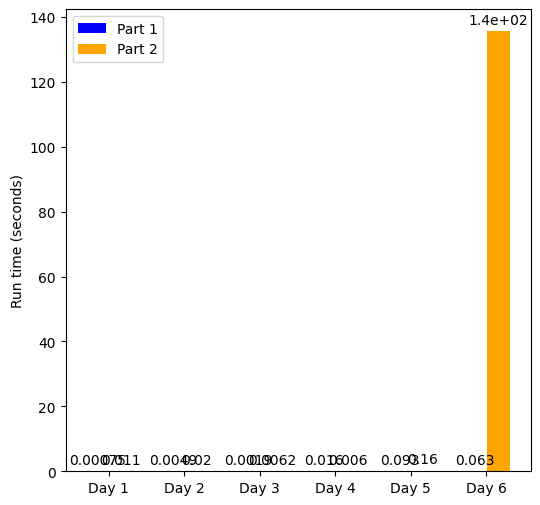

In [96]:
backend.plot_results()